## Определение перспективного тарифа для телеком-компании

### Описание проекта
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание тарифов
#### Тариф «Смарт»
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей

#### Тариф «Ультра»
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей

### Примечание 
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
      Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.
      Примите, что неиспользованные за предыдущий месяц звонки, смс, интернет на следующий месяц не переносятся.

## Шаг 1. Файл с данными и общая информация

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from math import ceil
from scipy import stats as st
users = pd.read_csv(r'C:\Users\Natalia\Downloads\users.csv') # информация о пользователях 
calls = pd.read_csv(r'C:\Users\Natalia\Downloads\calls.csv') # информация о звонках 
messages = pd.read_csv(r'C:\Users\Natalia\Downloads\messages.csv') # информация о сообщениях 
internet = pd.read_csv(r'C:\Users\Natalia\Downloads\internet.csv') # информация об интернет-сессиях
tariffs = pd.read_csv(r'C:\Users\Natalia\Downloads\tariffs.csv') # информация о тарифах

In [4]:
# информация о пользователях 
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Вывод: всего в выборке 500 наблюдений: 2 целочисленных и 6 текстовых, пропуски есть только в столбце "churn_date"

In [5]:
# информация о звонках
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Вывод: всего в выборке 202607 наблюдений: 1 целочисленный, 1 действительный и 2 текстовых. Пропусков нет

In [6]:
# информация о сообщениях 
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Вывод: всего в выборке 123036 наблюдений: 1 целочисленный и 2 текстовых. Пропусков нет

In [7]:
# информация об интернет-сессиях
internet.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Вывод: всего в выборке 149396 наблюдений: 2 целочисленных, 1 действительное и 2 текстовых. Пропусков нет

In [8]:
# информация о тарифах
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Вывод: всего в выборке 2 наблюдения: 7 целочисленных и 1 текстовое. Пропусков нет

## Шаг 2. Подготовка данных

### 1) Приведение к нужным типам

In [9]:
# замена типов данных в users
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y.%m.%d')
users['churn_date']= pd.to_datetime(users['churn_date'], format='%Y.%m.%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [10]:
# замена типов данных в calls
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y.%m.%d')
calls ['duration'] = np.ceil (calls ['duration']).astype('int64')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


In [11]:
# замена типов данных в messages
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y.%m.%d')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [12]:
# замена типов данных в internet
internet ['mb_used'] = np.ceil (internet ['mb_used']).astype('int64')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y.%m.%d')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  int64         
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 5.7+ MB


### 2) Исправление ошибок в данных

#### Таблица users (информация о пользователях)

In [13]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [14]:
users.duplicated().sum()

0

Так как указан уникальный идентификатор пользователя, можно отбросить личные данные, которые не пригодятся в исследовании

In [15]:
users = users.drop(users.columns[[4,5]], axis=1)
users.head()

,user_id,age,churn_date,city,reg_date,tariff
0,1000,52,NaT,Краснодар,2018-05-25,ultra
1,1001,41,NaT,Москва,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,2018-06-17,smart
3,1003,23,NaT,Москва,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,2018-05-14,ultra


#### Таблица calls (информация о звонках)

In [16]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


In [17]:
calls.duplicated().sum()

0

Дубликатов нет. Проанализируем длительность звонков и округлим звонки в большую сторону, так как каждый звонок округляется отдельно, даже если он длился всего 1 секунду, будет засчитан как 1 минута.

In [18]:
calls['duration'] = calls['duration'].replace(0,1)
calls.head() 

,id,call_date,duration,user_id
0,1000_0,2018-07-25,1,1000
1,1000_1,2018-08-17,1,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


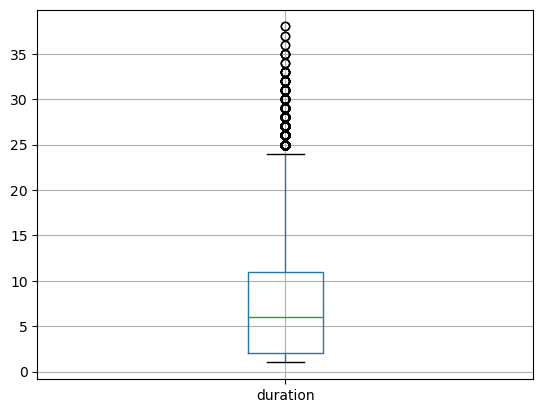

In [19]:
calls.boxplot(column=['duration'], grid=True) # удаление выбивающихся значений
plt.show()

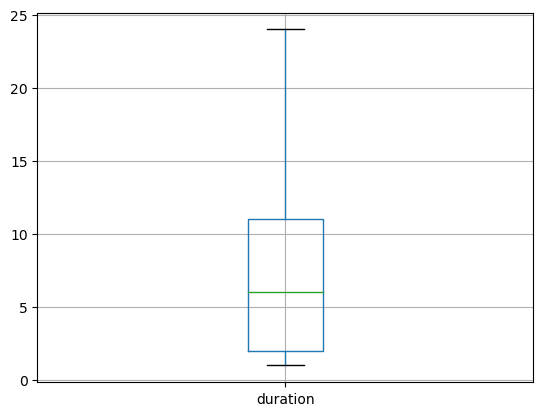

In [20]:
calls = calls.query('duration < 25')
calls.boxplot(column=['duration'], grid=True)
plt.show()

#### Таблица messages (информация о сообщениях)

In [21]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [22]:
messages.duplicated().sum()

0

#### Таблица internet (информация об интернет-сессиях)

In [23]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,113,2018-11-25,1000
1,1,1000_1,1053,2018-09-07,1000
2,2,1000_2,1198,2018-06-25,1000
3,3,1000_3,551,2018-08-22,1000
4,4,1000_4,303,2018-09-24,1000


In [24]:
internet.duplicated().sum()

0

In [25]:
internet = internet.drop(['Unnamed: 0'], axis=1)
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,1053,2018-09-07,1000
2,1000_2,1198,2018-06-25,1000
3,1000_3,551,2018-08-22,1000
4,1000_4,303,2018-09-24,1000


Меняем кол-во мегабайт с 0 на 1, так как по правилам компании необходимо округлять в большую сторону

In [26]:
internet['mb_used'] = internet['mb_used'].replace(0,1)
print(internet.query('mb_used == 0'))

Empty DataFrame
Columns: [id, mb_used, session_date, user_id]
Index: []


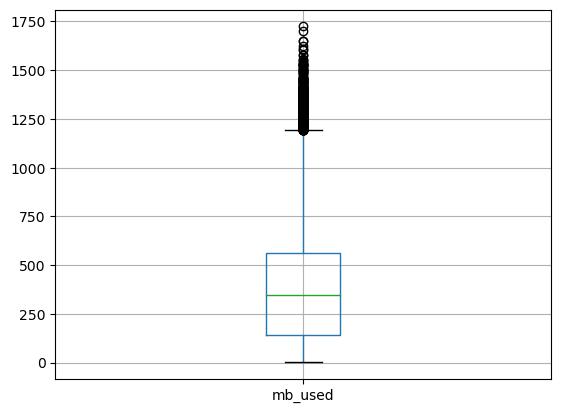

In [27]:
internet.boxplot(column=['mb_used'], grid=True)
plt.show()

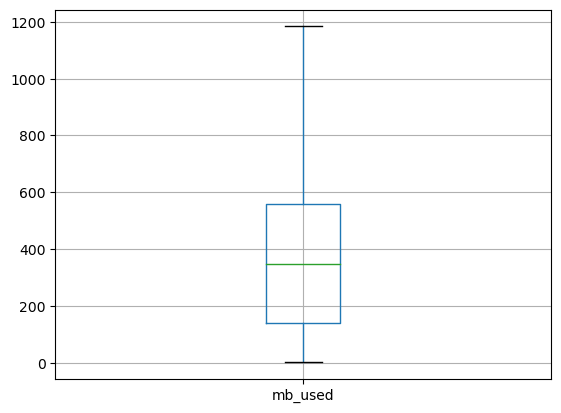

In [28]:
internet = internet.query('mb_used < 1185')
internet.boxplot(column=['mb_used'], grid=True)
plt.show()

#### Таблица tariffs (информация о тарифах)

In [29]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [30]:
tariffs = tariffs.rename(columns={'tariff_name': 'tariff'})
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


## Посчитаем и добавим в таблицу

#### Количество сделанных звонков и израсходованных минут разговора по месяцам

In [31]:
calls['month'] = calls['call_date'].dt.month
calls_sum =calls.groupby(['user_id','month']).agg({'duration':'sum', 'id': 'count'})
calls_sum = calls_sum.rename(columns={'duration': 'number_calls_spent', 'id': 'number_minutes_spent' })
calls_sum.head(10)

number_calls_spent  number_minutes_spent
user_id month                                          
1000    5                     164                    22
        6                     187                    43
        7                     346                    47
        8                     418                    52
        9                     478                    58
        10                    363                    57
        11                    319                    42
        12                    341                    46
1001    11                    444                    59
        12                    430                    63

#### Количество отправленных сообщений по месяцам

In [32]:
messages['month'] = messages['message_date'].dt.month
messages_sum =messages.groupby(['user_id','month']).agg({'id':'count'})
messages_sum = messages_sum.rename(columns={'id': 'number_messages_sent' })
messages_sum.head(10)

number_messages_sent
user_id month                      
1000    5                        22
        6                        60
        7                        75
        8                        81
        9                        57
        10                       73
        11                       58
        12                       70
1002    6                         4
        7                        11

#### Объем израсходованного интернет-трафика по месяцам

In [33]:
internet['month'] = internet['session_date'].dt.month
internet_sum =internet.groupby(['user_id','month']).agg({'mb_used':'sum'})
internet_sum = internet_sum.rename(columns={'mb_used': 'mb_used_sum'})
internet_sum.head(10)

mb_used_sum
user_id month             
1000    5             2257
        6            22064
        7            14017
        8            14072
        9            14583
        10           14717
        11           12154
        12            9829
1001    11           18460
        12           14059

#### Объединение 3х таблиц в одну

In [34]:
sum_df = calls_sum.merge(
messages_sum,
on=['user_id', 'month'], # название столбца, по которому объединять, передают в параметре on
how='outer', # режим объединения передают в параметре how
)
sum_df = sum_df.merge(
internet_sum,
on=['user_id', 'month'], # название столбца, по которому объединять, передают в параметре on
how='outer', # режим объединения передают в параметре how
)
sum_df.head(20)

number_calls_spent  number_minutes_spent  number_messages_sent  \
user_id month                                                                   
1000    5                   164.0                  22.0                  22.0   
        6                   187.0                  43.0                  60.0   
        7                   346.0                  47.0                  75.0   
        8                   418.0                  52.0                  81.0   
        9                   478.0                  58.0                  57.0   
        10                  363.0                  57.0                  73.0   
        11                  319.0                  42.0                  58.0   
        12                  341.0                  46.0                  70.0   
1001    11                  444.0                  59.0                   NaN   
        12                  430.0                  63.0                   NaN   
1002    6                   118.0                  15.0                   4.0   
        7                   192.0                  25.0                  11.0   
        8                   294.0                  42.0                  13.0   
        9                   217.0                  36.0                   4.0   
        10                  221.0                  33.0                  10.0   
        11                  250.0                  32.0                  16.0   
        12                  242.0                  33.0                  12.0   
1003    8                   392.0                  55.0                  37.0   
        9                   990.0                 134.0                  91.0   
        10                  866.0                 108.0                  83.0   

               mb_used_sum  
user_id month               
1000    5           2257.0  
        6          22064.0  
        7          14017.0  
        8          14072.0  
        9          14583.0  
        10         14717.0  
        11         12154.0  
        12          9829.0  
1001    11         18460.0  
        12         14059.0  
1002    6          10878.0  
        7          17615.0  
        8          20357.0  
        9          16724.0  
        10         13913.0  
        11         18621.0  
        12         18147.0  
1003    8           8572.0  
        9          12479.0  
        10         12260.0

#### Помесячная выручка с каждого пользователя 

In [35]:
# Добавим в таблицу данные о тарифах
sum_df = sum_df.merge(users, on='user_id', how='left').merge(tariffs, on='tariff', how='left')
sum_df

,user_id,number_calls_spent,number_minutes_spent,number_messages_sent,mb_used_sum,age,churn_date,city,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,164.0,22.0,22.0,2257.0,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,187.0,43.0,60.0,22064.0,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,346.0,47.0,75.0,14017.0,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,418.0,52.0,81.0,14072.0,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,478.0,58.0,57.0,14583.0,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,NaN,NaN,32.0,17246.0,35,NaT,Санкт-Петербург,2018-08-15,smart,50,15360,500,550,200,3,3
3210,1489,NaN,NaN,21.0,19599.0,35,NaT,Санкт-Петербург,2018-08-15,smart,50,15360,500,550,200,3,3
3211,1489,NaN,NaN,20.0,17526.0,35,NaT,Санкт-Петербург,2018-08-15,smart,50,15360,500,550,200,3,3
3212,1489,NaN,NaN,35.0,17349.0,35,NaT,Санкт-Петербург,2018-08-15,smart,50,15360,500,550,200,3,3


In [36]:
# замена пропусков на нулевые значения
ne_NaT = ['number_calls_spent', 'number_minutes_spent', 'number_messages_sent','mb_used_sum']

for i in ne_NaT:
    sum_df[i] = sum_df[i].fillna(0).astype('int64')
sum_df

,user_id,number_calls_spent,number_minutes_spent,number_messages_sent,mb_used_sum,age,churn_date,city,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,164,22,22,2257,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,187,43,60,22064,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,346,47,75,14017,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,418,52,81,14072,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,478,58,57,14583,52,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,0,0,32,17246,35,NaT,Санкт-Петербург,2018-08-15,smart,50,15360,500,550,200,3,3
3210,1489,0,0,21,19599,35,NaT,Санкт-Петербург,2018-08-15,smart,50,15360,500,550,200,3,3
3211,1489,0,0,20,17526,35,NaT,Санкт-Петербург,2018-08-15,smart,50,15360,500,550,200,3,3
3212,1489,0,0,35,17349,35,NaT,Санкт-Петербург,2018-08-15,smart,50,15360,500,550,200,3,3


In [37]:
#(вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из
# тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану)
def calculate_limit_min(row):
    if row['number_calls_spent'] > row['minutes_included']:
        return (row['number_calls_spent'] - row['minutes_included']) * row['rub_per_minute']
    else:
        return 0
sum_df['limit_min'] = sum_df.apply(calculate_limit_min, axis=1)


def calculate_limit_sms(row):
    if row['number_messages_sent'] > row['messages_included']:
        return (row['number_messages_sent'] - row['messages_included']) * row['rub_per_message']
    else:
        return 0
sum_df['limit_sms'] = sum_df.apply(calculate_limit_sms, axis=1)


def calculate_limit_internet(row):
    mb_used = row['mb_used_sum'] / 1024
    mb_included = row['mb_per_month_included'] / 1024  # Переводим мегабайты в гигабайты
    rub_per_gb = row['rub_per_gb']
    
    if mb_used > mb_included:
        return np.ceil((mb_used - mb_included) * rub_per_gb)
    else:
        return 0
sum_df['limit_internet'] = sum_df.apply(calculate_limit_internet, axis=1)

sum_df['revenue'] = sum_df['limit_min'] + sum_df['limit_sms'] + sum_df['limit_internet'] + sum_df['rub_monthly_fee']
sum_df

,user_id,number_calls_spent,number_minutes_spent,number_messages_sent,mb_used_sum,age,churn_date,city,reg_date,tariff,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,limit_min,limit_sms,limit_internet,revenue
0,1000,164,22,22,2257,52,NaT,Краснодар,2018-05-25,ultra,...,30720,3000,1950,150,1,1,0,0,0.0,1950.0
1,1000,187,43,60,22064,52,NaT,Краснодар,2018-05-25,ultra,...,30720,3000,1950,150,1,1,0,0,0.0,1950.0
2,1000,346,47,75,14017,52,NaT,Краснодар,2018-05-25,ultra,...,30720,3000,1950,150,1,1,0,0,0.0,1950.0
3,1000,418,52,81,14072,52,NaT,Краснодар,2018-05-25,ultra,...,30720,3000,1950,150,1,1,0,0,0.0,1950.0
4,1000,478,58,57,14583,52,NaT,Краснодар,2018-05-25,ultra,...,30720,3000,1950,150,1,1,0,0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,0,0,32,17246,35,NaT,Санкт-Петербург,2018-08-15,smart,...,15360,500,550,200,3,3,0,0,369.0,919.0
3210,1489,0,0,21,19599,35,NaT,Санкт-Петербург,2018-08-15,smart,...,15360,500,550,200,3,3,0,0,828.0,1378.0
3211,1489,0,0,20,17526,35,NaT,Санкт-Петербург,2018-08-15,smart,...,15360,500,550,200,3,3,0,0,424.0,974.0
3212,1489,0,0,35,17349,35,NaT,Санкт-Петербург,2018-08-15,smart,...,15360,500,550,200,3,3,0,0,389.0,939.0


In [38]:
sum_df.sort_values(by='revenue', ascending = False).head()

,user_id,number_calls_spent,number_minutes_spent,number_messages_sent,mb_used_sum,age,churn_date,city,reg_date,tariff,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,limit_min,limit_sms,limit_internet,revenue
3106,1486,999,132,83,38627,35,NaT,Нижний Новгород,2018-10-31,smart,...,15360,500,550,200,3,3,1497,99,4545.0,6691.0
1622,1261,1048,139,22,32717,46,NaT,Казань,2018-10-30,smart,...,15360,500,550,200,3,3,1644,0,3391.0,5585.0
3105,1486,763,107,96,36330,35,NaT,Нижний Новгород,2018-10-31,smart,...,15360,500,550,200,3,3,789,138,4096.0,5573.0
260,1042,755,121,75,36035,42,NaT,Хабаровск,2018-11-25,smart,...,15360,500,550,200,3,3,765,75,4039.0,5429.0
1000,1159,759,110,2,35195,64,NaT,Красноярск,2018-11-28,smart,...,15360,500,550,200,3,3,777,0,3875.0,5202.0


## Шаг 4. Проверка гипотез

In [39]:
#Выберем столбцы, необходимые для анализа
selected_columns = ['user_id','tariff', 'number_calls_spent', 'number_minutes_spent', 'number_messages_sent', 'mb_used_sum', 'revenue']
vubor = sum_df[selected_columns].copy()
vubor

,user_id,tariff,number_calls_spent,number_minutes_spent,number_messages_sent,mb_used_sum,revenue
0,1000,ultra,164,22,22,2257,1950.0
1,1000,ultra,187,43,60,22064,1950.0
2,1000,ultra,346,47,75,14017,1950.0
3,1000,ultra,418,52,81,14072,1950.0
4,1000,ultra,478,58,57,14583,1950.0
...,...,...,...,...,...,...,...
3209,1489,smart,0,0,32,17246,919.0
3210,1489,smart,0,0,21,19599,1378.0
3211,1489,smart,0,0,20,17526,974.0
3212,1489,smart,0,0,35,17349,939.0


In [40]:
# группировка по user_id
vubor = vubor.groupby('user_id').agg({
    'tariff': 'first',
    'number_calls_spent': 'sum',
    'number_minutes_spent': 'sum',
    'number_messages_sent': 'sum',
    'mb_used_sum': 'sum',
    'revenue': 'mean'})
vubor

,tariff,number_calls_spent,number_minutes_spent,number_messages_sent,mb_used_sum,revenue
user_id,,,,,,
1000,ultra,2616,367,496,103693,1950.000000
1001,smart,874,122,0,32519,853.000000
1002,smart,1534,216,70,116255,959.428571
1003,ultra,3887,519,380,54812,1950.000000
1004,ultra,1024,176,1192,142867,1950.000000
...,...,...,...,...,...,...
1495,ultra,3994,564,340,127546,2261.800000
1496,smart,6093,826,468,271410,2309.750000
1497,smart,1424,200,51,45642,906.666667


### Тариф ultra

In [41]:
tariff_ultra = vubor[vubor['tariff']=='ultra']
tariff_ultra

,tariff,number_calls_spent,number_minutes_spent,number_messages_sent,mb_used_sum,revenue
user_id,,,,,,
1000,ultra,2616,367,496,103693,1950.0
1003,ultra,3887,519,380,54812,1950.0
1004,ultra,1024,176,1192,142867,1950.0
1013,ultra,972,142,42,29283,1950.0
1016,ultra,128,20,142,25629,1950.0
...,...,...,...,...,...,...
1476,ultra,4071,541,45,147987,1950.0
1485,ultra,606,94,155,23450,1950.0
1491,ultra,4637,644,432,159101,1950.0


In [42]:
tariff_ultra.describe()

,number_calls_spent,number_minutes_spent,number_messages_sent,mb_used_sum,revenue
count,148.000000,148.000000,148.000000,148.000000,148.000000
mean,3529.533784,485.858108,328.533784,126121.445946,2055.602157
std,2699.294971,371.920535,337.810143,85283.125899,242.452091
min,0.000000,0.000000,0.000000,0.000000,1950.000000
25%,1182.000000,167.000000,55.500000,60211.500000,1950.000000
50%,3153.500000,430.500000,251.000000,104836.000000,1950.000000
75%,5064.750000,700.500000,468.000000,172191.250000,1950.781250
max,12935.000000,1746.000000,1463.000000,367881.000000,2993.500000


In [43]:
len(sum_df.query('tariff =="ultra"')['user_id'].unique())

148

### Вывод:
Тарифом ultra пользуется 148 пользователей 

Среднее колличество:

    звонков - 3530 
    потраченных минут - 486 (включенно 3000)
    отправленных сообщений - 329 (включенно 1000)
    потраченного интернета - 126121 Гб (включенно 30720)
    выручка с пользователя - 2055 руб.

Доплачивать пользователи будут только за интернет.

Так как ежемесячная стоимость данного тарифа 1950 рублей, а средняя выручка с пользователя 2055 рублей, можно сделать вывод о том, что пользователи в среднем переплачивают 105 рублей сверх тарифа.

In [44]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Тариф smart

In [45]:
tariff_smart = vubor[vubor['tariff']=='smart']
tariff_smart

,tariff,number_calls_spent,number_minutes_spent,number_messages_sent,mb_used_sum,revenue
user_id,,,,,,
1001,smart,874,122,0,32519,853.000000
1002,smart,1534,216,70,116255,959.428571
1005,smart,6619,882,552,99851,823.750000
1006,smart,3519,503,0,163280,853.545455
1007,smart,4376,607,225,131876,859.444444
...,...,...,...,...,...,...
1494,smart,1966,274,0,77132,905.200000
1496,smart,6093,826,468,271410,2309.750000
1497,smart,1424,200,51,45642,906.666667


In [46]:
tariff_smart.describe()

,number_calls_spent,number_minutes_spent,number_messages_sent,mb_used_sum,revenue
count,350.000000,350.000000,350.000000,350.000000,350.000000
mean,2684.857143,370.454286,212.608571,102782.608571,1257.937906
std,1762.448626,243.166602,223.290034,59982.871175,583.626738
min,0.000000,0.000000,0.000000,11097.000000,550.000000
25%,1309.750000,180.000000,39.000000,52346.500000,813.312500
50%,2321.000000,320.500000,141.000000,97391.000000,1122.083333
75%,3850.000000,524.250000,324.000000,143021.250000,1584.229167
max,8575.000000,1180.000000,1092.000000,271410.000000,4271.333333


In [47]:
len(sum_df.query('tariff =="smart"')['user_id'].unique())

350

### Вывод:
Тарифом smart пользуется 350 пользователей 

Среднее колличество:

    звонков - 2685 
    потраченных минут - 370 (включенно 500)
    отправленных сообщений - 213 (включенно 50)
    потраченного интернета - 102783 Гб (включенно 15360)
    выручка с пользователя - 1258 руб.
Пользователи будут доплачивать за сообщения и интернет.
Так как ежемесячная стоимость данного тарифа 550 рублей, а средняя выручка с пользователя 1258 рублей, можно сделать вывод о том, что пользователи данного тарифа будут почти всегда переплачивать больше половины стоимости тарифа.

In [48]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


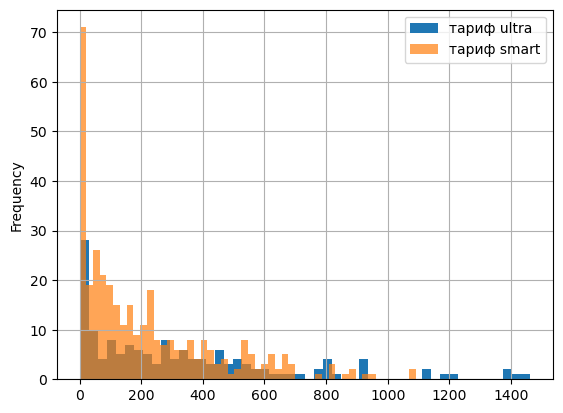

In [68]:
ax = tariff_ultra['number_messages_sent'].plot(kind='hist', style='o-',grid=True, bins = 50)
tariff_smart['number_messages_sent'].plot(kind='hist', style='o-',ax=ax, grid=True, alpha=0.7, bins = 50)
ax.legend(["тариф ultra", "тариф smart"])
plt.show()

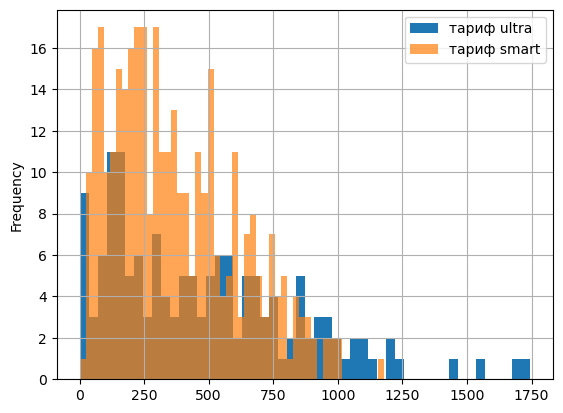

In [70]:
ax = tariff_ultra['number_minutes_spent'].plot(kind='hist', style='o-',grid=True, bins = 50)
tariff_smart['number_minutes_spent'].plot(kind='hist', style='o-',ax=ax, grid=True, alpha=0.7, bins = 50)
ax.legend(["тариф ultra", "тариф smart"])
plt.show()

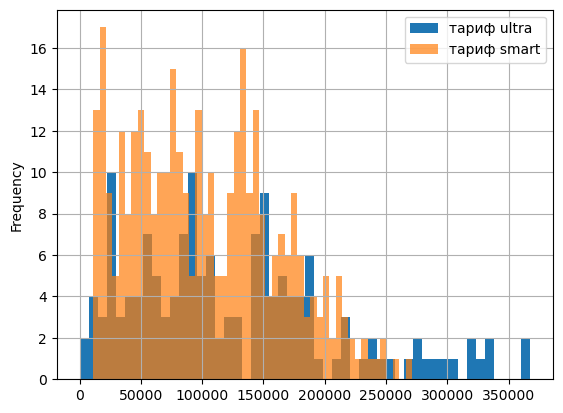

In [71]:
ax = tariff_ultra['mb_used_sum'].plot(kind='hist', style='o-',grid=True, bins = 50)
tariff_smart['mb_used_sum'].plot(kind='hist', style='o-',ax=ax, grid=True, alpha=0.7, bins = 50)
ax.legend(["тариф ultra", "тариф smart"])
plt.show()

## Вывод:
В тарифе ultra пользователи не переплачивают за минуты и смс, по интернету есть небольшой перерасход. Пользователи в целом не переплачивают сверх тарифа.
В тарифе smart пользователям сильно не хватает месячного лимита на смс и интернет.

## Шаг 4. Проверяем гипотезы

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

### Гипотезы
- H0 средняя выручка пользователей тарифов «Ультра» и «Смарт» равны
- H1 средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны

In [82]:
from scipy import stats as st

df_ultra_revenue=sum_df.query('tariff =="ultra"')
df_smart_revenue=sum_df.query('tariff =="smart"')

alpha = .05
results = st.ttest_ind(
df_ultra_revenue['revenue'],
df_smart_revenue['revenue'])
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  3.5119041919355767e-191
Отвергаем нулевую гипотезу


#### Вывод: отвергаем нулевую гипотезу, тоесть средняя выручка тарифов Ultra и Smart не равны

- H0 средняя выручка пользователей из Москвы равна выручке пользователей из других регионов
- H1 средняя выручка пользователей из Москвы не равна выручке пользователей из других регионов

In [83]:
from scipy import stats as st

df_Moscow=sum_df.query('city == "Москва"')
df_ne_Moscow=sum_df.query('tariff != "Москва"')

alpha = .05
results = st.ttest_ind(
df_Moscow['revenue'],
df_ne_Moscow['revenue'])
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5875963188229257
Не получилось отвергнуть нулевую гипотезу


#### Вывод: Не получилось отвергнуть нулевую гипотезу, средняя выручка пользователей из Москвы не отличается от выручки из других регионов.

## Вывод:
По результатам исследования можно сделать вывод о том, что средняя выручка от пользователя тарифа "Ультра" выше тарифа "Смарт".
- основная часть прибыли по тарифу "Смарт" от дополнительных расходов.
- большинство пользователей тарифа "Смарт" хотя бы раз превышали установленные лимиты по тарифу.
- пользователи тарифа "Ультра" в большинстве случаев не расходуют даже половину установленных лимитов.
Рассмотрели гипотезы о том, что:
- средняя выручка тарифов Ultra и Smart не равны
- средняя выручка пользователей из Москвы не отличается от выручки из других регионов

Стоит рекламировать тариф "Ультра". 
Но нужно следить за тем что, частые превышения лимитов и переплаты пользователей "Смарт" и большой остаток не использованных ресурсов "Ультра" может привести к потере клиентов.